# Numpy
http://www.numpy.org/

# Scipy
http://www.scipy.org/

# Astropy
http://www.astropy.org/

# Matplotlib

From https://github.com/jonathansick/awesome-astronomy
- [AplPy](http://aplpy.github.io) - a Python module for astronomical imaging data.
- [Astropy](http://astropy.org) - Core package for Astronomy in Python.
- [AstroML](http://www.astroml.org) - Companion textbook *Statistics, Data Mining, and Machine Learning in Astronomy*.
- [Emcee](http://dan.iel.fm/emcee/current/) - Seriously kick-ass MCMC.
- [GalPy](https://github.com/jobovy/galpy) - Galactic Dynamics in python.
- [The LSST Stack](https://confluence.lsstcorp.org/display/LSWUG/Using+the+LSST+Stack) Conda-installable codes for working with LSST simulation data and some existing data.

# Organize data

## numpy.ndarray
    simple but powerful
## numpy.ma.MaskedArray
    ndarray with mask
## astropy.table
    specifically designed for astro table
## pandas.DataFrame
    good at data clearning, suitable for collect and clean data from real life

# Basic about numpy.ndarray

In [30]:
a = [1,2,3]
b = a + 1 # a normal list cannot "add"

TypeError: can only concatenate list (not "int") to list

In [31]:
import numpy as np
a = np.array([1,2,3]) # transform a list into a numpy array
print(a + 1)

[2 3 4]


In [32]:
a = np.arange(0,10,0.5)
print(a)
print(a.dtype)
print(np.sin(a))
print(np.mean(a))

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
float64
[ 0.          0.47942554  0.84147098  0.99749499  0.90929743  0.59847214
  0.14112001 -0.35078323 -0.7568025  -0.97753012 -0.95892427 -0.70554033
 -0.2794155   0.21511999  0.6569866   0.93799998  0.98935825  0.79848711
  0.41211849 -0.07515112]
4.75


In [33]:
a>3

array([False, False, False, False, False, False, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

In [34]:
a[a>3]

array([3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [35]:
print(np.where(a>3))
print(np.argwhere(a>3)) # np.argwhere return a different shape

(array([ 7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19]),)
[[ 7]
 [ 8]
 [ 9]
 [10]
 [11]
 [12]
 [13]
 [14]
 [15]
 [16]
 [17]
 [18]
 [19]]


In [36]:
a[np.where(a>3)]

array([3.5, 4. , 4.5, 5. , 5.5, 6. , 6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [37]:
a[(a>3)&(a<4)], a[np.logical_and(a>3, a<4)], a[(a>3)*(a<4)]

(array([3.5]), array([3.5]), array([3.5]))

In [38]:
print(a)
b = a.astype(np.int)
print(b)
print(b.dtype)

[0.  0.5 1.  1.5 2.  2.5 3.  3.5 4.  4.5 5.  5.5 6.  6.5 7.  7.5 8.  8.5
 9.  9.5]
[0 0 1 1 2 2 3 3 4 4 5 5 6 6 7 7 8 8 9 9]
int64


In [39]:
b.dtype = np.float64 # be careful when changing dtype
print(b)

[0.0e+000 0.0e+000 4.9e-324 4.9e-324 9.9e-324 9.9e-324 1.5e-323 1.5e-323
 2.0e-323 2.0e-323 2.5e-323 2.5e-323 3.0e-323 3.0e-323 3.5e-323 3.5e-323
 4.0e-323 4.0e-323 4.4e-323 4.4e-323]


In [40]:
a = np.arange(24).reshape((2,3,4))
b = np.arange(24).reshape((2,-1,4))
print(a.shape, b.shape)
print(a)

(2, 3, 4) (2, 3, 4)
[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [41]:
print(a[:,1:2,2])
print('')
print(a[0,:,1])
print('')
print(a[:])

[[ 6]
 [18]]

[1 5 9]

[[[ 0  1  2  3]
  [ 4  5  6  7]
  [ 8  9 10 11]]

 [[12 13 14 15]
  [16 17 18 19]
  [20 21 22 23]]]


In [42]:
# generate a file for numpy to read later
import random
dataHeaders = " id  x     y ra     dec".split()
dataTypes   = "U20 i8 int16 f8 float16".split()
print(dataHeaders)
print(dataTypes)
todo = [(header, type) for header, type in zip(dataHeaders, dataTypes)]
dataType = np.dtype(todo)
print(todo)

# generate data to read
outputList = []
for i in range(10):
    outputList.append("{:10} {:10d} {:10d} {:10f} {:10f}". # format is more advanced than %
        format(np.random.randint(9999),
               np.random.randint(9999),
               np.random.randint(9999),
               np.random.rand(),
               np.random.rand()))
with open('./temp.dat', 'w') as f:
    f.write('\n'.join(outputList))

['id', 'x', 'y', 'ra', 'dec']
['U20', 'i8', 'int16', 'f8', 'float16']
[('id', 'U20'), ('x', 'i8'), ('y', 'int16'), ('ra', 'f8'), ('dec', 'float16')]


In [43]:
cat ./temp.dat


      7536       3638       6190   0.402099   0.490017
      6166       2278       8972   0.337858   0.071140
       175       2876       4880   0.023578   0.356499
      7833       9286       9427   0.059648   0.166795
       659       5622       2897   0.975304   0.570214
      7892       9106        692   0.925889   0.172355
      2282       7179       7580   0.310859   0.304768
      5826       2297       3485   0.466966   0.529815
       429        597       5314   0.056375   0.213810
      1772       5785       6208   0.660028   0.898092

In [44]:
# load it use np.loadtxt
data = np.loadtxt('./temp.dat', dtype=dataType)
data

array([('7536', 3638, 6190, 0.402099, 0.49   ),
       ('6166', 2278, 8972, 0.337858, 0.07117),
       ('175', 2876, 4880, 0.023578, 0.3564 ),
       ('7833', 9286, 9427, 0.059648, 0.1667 ),
       ('659', 5622, 2897, 0.975304, 0.5703 ),
       ('7892', 9106,  692, 0.925889, 0.1724 ),
       ('2282', 7179, 7580, 0.310859, 0.3047 ),
       ('5826', 2297, 3485, 0.466966, 0.53   ),
       ('429',  597, 5314, 0.056375, 0.2139 ),
       ('1772', 5785, 6208, 0.660028, 0.898  )],
      dtype=[('id', '<U20'), ('x', '<i8'), ('y', '<i2'), ('ra', '<f8'), ('dec', '<f2')])

In [45]:
import pprint
# load it manually
dataList = []
with open('./temp.dat') as f:
    for eachline in f:
        eachRow = tuple(eachline.split())
        dataList.append(eachRow)
pprint.pprint(dataList)

data = np.array(dataList, dtype=dataType)
data

[('7536', '3638', '6190', '0.402099', '0.490017'),
 ('6166', '2278', '8972', '0.337858', '0.071140'),
 ('175', '2876', '4880', '0.023578', '0.356499'),
 ('7833', '9286', '9427', '0.059648', '0.166795'),
 ('659', '5622', '2897', '0.975304', '0.570214'),
 ('7892', '9106', '692', '0.925889', '0.172355'),
 ('2282', '7179', '7580', '0.310859', '0.304768'),
 ('5826', '2297', '3485', '0.466966', '0.529815'),
 ('429', '597', '5314', '0.056375', '0.213810'),
 ('1772', '5785', '6208', '0.660028', '0.898092')]


array([('7536', 3638, 6190, 0.402099, 0.49   ),
       ('6166', 2278, 8972, 0.337858, 0.07117),
       ('175', 2876, 4880, 0.023578, 0.3564 ),
       ('7833', 9286, 9427, 0.059648, 0.1667 ),
       ('659', 5622, 2897, 0.975304, 0.5703 ),
       ('7892', 9106,  692, 0.925889, 0.1724 ),
       ('2282', 7179, 7580, 0.310859, 0.3047 ),
       ('5826', 2297, 3485, 0.466966, 0.53   ),
       ('429',  597, 5314, 0.056375, 0.2139 ),
       ('1772', 5785, 6208, 0.660028, 0.898  )],
      dtype=[('id', '<U20'), ('x', '<i8'), ('y', '<i2'), ('ra', '<f8'), ('dec', '<f2')])

In [46]:
data[0]

('7536', 3638, 6190, 0.402099, 0.49)

# numpy masked array

In [104]:
import numpy as np
from numpy import ma

x = np.array([100, 1, 2, -1, 4])
y = np.array([0, 1, 2, 9999, 4])
mx = ma.array(x, mask=[0, 0, 0, 1, 0]) # or True/False
print(mx, mx[3], mx[3].mask) # also support slicing

my = ma.masked_values(y, 9999)
print(my)
print(x*y, mx*y, mx*my)

[100 1 2 -- 4] -- True
[0 1 2 -- 4]
[    0     1     4 -9999    16] [0 1 4 -- 16] [0 1 4 -- 16]


In [47]:
# access the data
print(mx.data)
print(ma.getdata(mx))
print(np.array(mx))

[ 0  1  2 -1  4]
[ 0  1  2 -1  4]
[ 0  1  2 -1  4]


In [57]:
# access only the valid entries
print(mx.mask)
print(mx[~mx.mask])

print(mx.compressed())

[False False False  True False]
[0 1 2 4]
[0 1 2 4]


In [72]:
# modify mask
mx = ma.array(x, mask=[0, 0, 0, 1, 0])
print(mx)
mx[0] = ma.masked
print(mx)

mx.mask[0] = False
print(mx)

mx.mask = False # unmask all
mx.mask = ma.nomask
print(mx)

[0 1 2 -- 4]
[-- 1 2 -- 4]
[0 1 2 -- 4]
[0 1 2 -1 4]


In [89]:
# hard mask
mx = ma.array(x, mask=[1, 0, 0, 1, 0])
print(mx)
mx[0] = 5
print(mx) # assigning a new value unmask the element

mx.harden_mask() # harden the mask
mx[3] = 999
print(mx)
mx.soften_mask()

my = ma.array(x, mask=[1, 0, 0, 1, 0], hard_mask=True) # another way
my[0] = 5
print(my)

[-- 1 2 -- 4]
[5 1 2 -- 4]
[5 1 2 -- 4]
[-- 1 2 -- 4]


# Pandas

https://pandas.pydata.org

- Serie: 1-D numpy array + index array
- DataFrame: multiple series

In [31]:
# serie
import numpy as np
import pandas as pd

s = pd.Series([42, 43, 44])
print(s, '\n')

s = pd.Series([42, 43, 44], index=['electron', 'proton', 'neutron']) # index can be non-integer
print(s2, '\n')
print(s2[1], s2['proton'], '\n')
print(s2['proton':], '\n')

t = pd.Series([42, 43, 44, 1], index=['electron', 'proton', 'neutron', 'neutrino'])
print(s + st)

0    42
1    43
2    44
dtype: int64 

electron    42
proton      43
neutron     44
dtype: int64 

43 43 

proton     43
neutron    44
dtype: int64 

electron    84.0
neutrino     NaN
neutron     88.0
proton      86.0
dtype: float64


In [73]:
# dataframe
df = pd.DataFrame({'S': s, 'T': t})
print(df, '\n')

print(df[1:3], '\n')

print(df.loc['electron':'neutron', 'T'], '\n') # row, column

print(df.T, '\n')

print(df > 42)

             S   T
electron  42.0  42
neutrino   NaN   1
neutron   44.0  44
proton    43.0  43 

             S   T
neutrino   NaN   1
neutron   44.0  44 

electron    42
neutrino     1
neutron     44
Name: T, dtype: int64 

   electron  neutrino  neutron  proton
S      42.0       NaN     44.0    43.0
T      42.0       1.0     44.0    43.0 

              S      T
electron  False  False
neutrino  False  False
neutron    True   True
proton     True   True


In [59]:
# add and delete
dg = df.append(pd.DataFrame({'S': [20]}, index=['positron']))
print(dg, '\n')

dg['small'] = dg['T'] < 50
print(dh, '\n')

dg = dg.drop('neutrino')
print(dh, '\n')

dh = dg.drop(['T', 'small'], axis=1)
print(dh)

             S     T
electron  42.0  42.0
neutrino   NaN   1.0
neutron   44.0  44.0
proton    43.0  43.0
positron  20.0   NaN 

             S     T
electron  42.0  42.0
neutron   44.0  44.0
proton    43.0  43.0
positron  20.0   NaN 

             S     T
electron  42.0  42.0
neutron   44.0  44.0
proton    43.0  43.0
positron  20.0   NaN 

             S
electron  42.0
neutron   44.0
proton    43.0
positron  20.0


In [74]:
# I/O
df = pd.read_excel('pd_test.xlsx')
print(df)

         SysTime  CtrlState  TRP_PhaPos_X  TRP_PhaPos_Y  TRP_PhaPos_Z
0  1563242400000          1      -62.8442       52.6798      -139.426
1  1563242400200          1      -62.8420       52.6802      -139.427
2  1563242400400          1      -62.8399       52.6806      -139.428
3  1563242400600          1      -62.8377       52.6810      -139.429
4  1563242400800          1      -62.8355       52.6814      -139.429


# Dealing with FITS
Flexible Image Transport System

In [92]:
from astropy.io import fits
hdul = fits.open('B0950+08_gl98_408.fits')
print(hdul.info())

Filename: B0950+08_gl98_408.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      64   ()      
  1  HISTORY       1 BinTableHDU     71   1R x 28C   [24A, 256A, 8A, 8A, 1J, 1I, 1I, 1I, 1D, 1D, 1J, 1D, 1D, 1D, 1I, 1I, 1I, 1I, 1I, 32A, 32A, 32A, 256A, 32A, 32A, 1I, 32A, 1I]   
  2  SUBINT        1 BinTableHDU     72   1R x 11C   [1D, 1D, 1D, 1D, 1D, 1D, D, E, 4E, 4E, 1872I]   
None


In [94]:
hdul[0].header

SIMPLE  =                    T / file does conform to FITS standard             
BITPIX  =                    8 / number of bits per data pixel                  
NAXIS   =                    0 / number of data axes                            
EXTEND  =                    T / FITS dataset may contain extensions            
COMMENT   FITS (Flexible Image Transport System) format is defined in 'Astronomy
COMMENT   and Astrophysics', volume 376, page 359; bibcode: 2001A&A...376..359H 
COMMENT   FITS (Flexible Image Transport System) format defined in Astronomy and
COMMENT   Astrophysics Supplement Series v44/p363, v44/p371, v73/p359, v73/p365.
COMMENT   Contact the NASA Science Office of Standards and Technology for the   
COMMENT   FITS Definition document #100 and other FITS information.             
HDRVER  = '5.4             '   / Header version                                 
FITSTYPE= 'PSRFITS         '   / FITS definition for pulsar data files          
DATE    = '                '

In [8]:
print(hdul['PRIMARY'].header['TELESCOP']) # get one item in primary header

lovell


In [13]:
print(hdul[2].columns)

ColDefs(
    name = 'INDEXVAL'; format = '1D'
    name = 'TSUBINT'; format = '1D'; unit = 's'
    name = 'OFFS_SUB'; format = '1D'; unit = 's'
    name = 'PERIOD'; format = '1D'; unit = 's'
    name = 'AUX_DM'; format = '1D'; unit = 'CM-3'
    name = 'AUX_RM'; format = '1D'; unit = 'RAD'
    name = 'DAT_FREQ'; format = 'D'; unit = 'MHz'
    name = 'DAT_WTS'; format = 'E'
    name = 'DAT_OFFS'; format = '4E'
    name = 'DAT_SCL'; format = '4E'
    name = 'DATA'; format = '1872I'; unit = 'Jy'; dim = '(468,1,4)'
)


In [15]:
dat_freq = hdul[2].data['DAT_FREQ']
print(dat_freq)

[408.]


In [20]:
print(hdul[2].header['POL_TYPE'])
data = hdul[2].data['DATA']
print(data.shape)

IQUV
(1, 4, 1, 468)


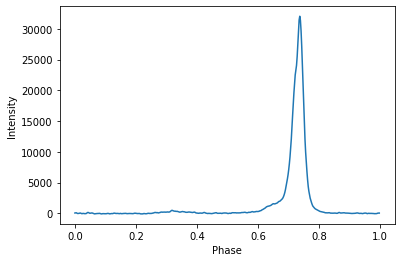

In [37]:
import numpy as np
import matplotlib.pyplot as plt
dat_scl = hdul[2].data['DAT_SCL']
dat_offs = hdul[2].data['DAT_OFFS']
stokes_i = data[0, 0, 0]*dat_scl[0, 0] + dat_offs[0, 0]
phase = np.linspace(0, 1, len(stokes_i), endpoint=False)
plt.plot(phase, stokes_i) # let's plot the Stokes I
plt.xlabel('Phase')
plt.ylabel('Intensity')
plt.show()
plt.close()

# Multiprocessing
https://docs.python.org/3.7/library/multiprocessing.html

(In python, multithreading does not improve the calculation speed. Python is a dynamic language. All the threads are run in one process, hence only one CPU is used. In fact, too many threads may even block the CPU. Multithreading is useful when the total speed is limited by other factors, e.g. disk i/o.)

In [27]:
import multiprocessing as mp

def f(x):
    return x**2

with mp.Pool(4) as p:
    print(p.map(f, [1, 2, 3]))

[1, 4, 9]


In [29]:
# a way to send multiple arguments
import multiprocessing as mp

def f(x, power):
    return x**power

with mp.Pool(4) as p:
    print(p.starmap(f, [[1,1], [2,2], [3,3]]))

[1, 4, 27]


# Cython
"Cython is Python with C data types."

- Compiled before run

- declared variable type

http://docs.cython.org/en/latest/

#======prime_python.py======
```python
def primes(nb_primes):
    p = []
    if nb_primes > 1000:
        nb_primes = 1000

    len_p = 0  # The current number of elements in p.
    n = 2
    while len_p < nb_primes:
        # Is n prime?
        for i in p[:len_p]:
            if n % i == 0:
                break

        # If no break occurred in the loop, we have a prime.
        else:
            p.append(n)
            len_p += 1
        n += 1

    return(p)
```

#======prime_cython.pyx======
```python
def primes(int nb_primes): # declare argument type
    cdef int n, i, len_p # define variables in C style can speed up a lot
    cdef int p[1000]
    if nb_primes > 1000:
        nb_primes = 1000

    len_p = 0
    n = 2
    while len_p < nb_primes:
        for i in p[:len_p]:
            if n % i == 0:
                break

        else:
            p[len_p] = n
            len_p += 1
        n += 1

    result_as_list  = [prime for prime in p[:len_p]]
    return(result_as_list)
```

#======setup.py======
```python
from distutils.core import setup
from Cython.Build import cythonize

setup(
    ext_modules = cythonize("prime.pyx", annotate=True)
)
```
Then compile the cython:

**python setup.py build_ext --inplace**

In [44]:
# test ordinary python code
import cython_test.prime_python as prime
import time

t1 = time.time()
result = prime.primes(1000)
t2 = time.time()
dt = t2 - t1
print(result[0], result[-1])
print('time used: %e s'%dt)

2 7919
time used: 6.408405e-02 s


In [43]:
# test cython code
import cython_test.prime_cython as prime
import time

t1 = time.time()
result = prime.primes(1000)
t2 = time.time()
dt = t2 - t1
print(result[0], result[-1])
print('time used: %e s'%dt)

2 7919
time used: 3.586054e-03 s


# Operating system: [os](https://docs.python.org/3.7/library/os.html)

In [118]:
import os
print(os.getppid())
print(os.getcwd())
print(os.listdir())
print(os.scandir())
print(os.path.isdir('demo'))
print(os.path.isfile('dickens.txt'))

6727
/Users/jjc/data/pythonGuide
['demo', 'dickens.txt', 'cython_test', '.DS_Store', 'lecture2.ipynb', 'figs', 'pd_test.xlsx', 'outFile.txt', 'lecture1.ipynb', '.gitignore', '.ipynb_checkpoints', 'testFile.txt', '.git', 'temp.dat', 'data.txt', 'B0950+08_gl98_408.fits']
True
True


```os.chdir(), os.mkdir(), os.remove(), os.removedirs(), os.rename(), os.fchmod(), os.fchown() ......
```

# Parsing arguments to python

- sys.argv

```python
import sys
args = sys.argv[1:] # start from the second element. sys.argv[0] is the python file name.
```

- argparse

python cal.py -h

python cal.py -p *.ar -cal *.cal --hand -1

```python
import sys
import argparse

def parse_arguments(argv): #sys.argv[0] should have been excluded
    parser = argparse.ArgumentParser()
    parser.add_argument('-p', '--psr', nargs='+', action='store', dest='psrfiles', default=[], help='the data files to be calibrated')
    parser.add_argument('-c', '--cal', action='store', dest='calfiles', nargs='+', default=[], help='the calibration noises')
    parser.add_argument('--hand', action='store', dest='hand', help='rcvr:hand, +1 or -1', default=0)
    parser.add_argument('--phase', action='store', dest='phase', help='be:phase, +1 or -1', default=0)
    parser.add_argument('-e', action='store', dest='extension', default='calibp', help='extension of the output file')
    args = parser.parse_args()
    return(args)

if __name__ == '__main__':
    args = parse_arguments(sys.argv[1:]))
```

# Regular expression: [re](https://docs.python.org/3.7/library/re.html)

```.``` Matches any character except a newline

```^``` Matches the start of the string

```$``` Matches the end of the string

```*``` Match 0 or more repetitions of the preceding RE

```+``` Match 1 or more repetitions of the preceding RE

```?``` Match 0 or 1 repetitions of the preceding RE

```{m}``` Match m repetitions of the preceding RE

```{m,n}``` Match m to n repetitions of the preceding RE

```\``` Special characters (match characters like *, ?), or signals a special sequence

```[]``` A set of characters: [amk], [a-z], [0-9A-Fa-f]. [^5] maches all characters except 5.

```\d``` decimal digit

```\D``` any character not a decimal digit

```\s``` whitespace character (```[ \t\n\r\f\v]```)

```\S``` any character not a whitespace character

```\w``` word character

```\W``` any character not a word character

```A|B``` Match either A or B. A and B can be arbitrary REs.

............

In [76]:
with open('dickens.txt') as f:
    text = f.read()
    print(text)

It was the best of times, it was the worst of times, it was the age of wisdom, it was the age of foolishness, it was the epoch of belief, it was the epoch of incredulity, it was the season of Light, it was the season of Darkness, it was the spring of hope, it was the winter of despair, we had everything before us, we had nothing before us, we were all going direct to Heaven, we were all going direct the other way – in short, the period was so far like the present period, that some of its noisiest authorities insisted on its being received, for good or for evil, in the superlative degree of comparison only.



In [101]:
import re
pattern1 = re.compile('\w+\sof\s\w+')
print(re.match(pattern1, text))
s = re.search(pattern1, text)
print(s)
print(s.pos)

None
<re.Match object; span=(11, 24), match='best of times'>
0


In [103]:
# how to get matched parts
pattern2 = re.compile('(\w+)\sof\s(\w+)') # () group
s = re.search(pattern2, text)
print(s.groups(), '\n')

print(re.findall(pattern1, text), '\n')
print(re.findall(pattern2, text), '\n')

('best', 'times') 

['best of times', 'worst of times', 'age of wisdom', 'age of foolishness', 'epoch of belief', 'epoch of incredulity', 'season of Light', 'season of Darkness', 'spring of hope', 'winter of despair', 'some of its', 'degree of comparison'] 

[('best', 'times'), ('worst', 'times'), ('age', 'wisdom'), ('age', 'foolishness'), ('epoch', 'belief'), ('epoch', 'incredulity'), ('season', 'Light'), ('season', 'Darkness'), ('spring', 'hope'), ('winter', 'despair'), ('some', 'its'), ('degree', 'comparison')] 



# Cautions about python3, encoding

In [49]:
a = '你好'
b = u'你好'
c = a.encode('utf-8')
print(a)
print(b)
print(c)
print((a,b,c,c.decode('utf-8')))

你好
你好
b'\xe4\xbd\xa0\xe5\xa5\xbd'
('你好', '你好', b'\xe4\xbd\xa0\xe5\xa5\xbd', '你好')


# Debug

    import pdb
    pdb.set_trace()

    import ipdb
    ipdb.set_trace()

In [ ]:
import pdb
a = 1
print(a)
pdb.set_trace()
print(a + 1)

1
--Return--
> <ipython-input-50-87eee85afb7f>(4)<module>()->None
-> pdb.set_trace()
(Pdb) 
(Pdb) 
(Pdb) 
(Pdb) 
(Pdb) 
(Pdb) 
(Pdb) 
(Pdb) 
(Pdb) a


# freestyle to learn python package

* document (tutorial, example, gallery)
* jupyter + notebook or ipython
* make your own notes or snippets